In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nicocasa26/friends/refs/heads/main/friends_july_2024.csv')


# Informacion de Data Frame

A continuacion usamos metodos para tener mas informacion del DataFrame


In [ ]:
df.describe()

,season,episode,duration_in_minutes,year,rating,total_votes,special_episode
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,5.341880,12.303419,22.371795,1998.923077,8.281624,5456.128205,0.072650
std,2.799946,6.913772,2.002845,2.824339,0.426941,1347.480166,0.260117
min,1.000000,1.000000,22.000000,1994.000000,6.900000,4177.000000,0.000000
25%,3.000000,6.000000,22.000000,1997.000000,8.000000,4694.250000,0.000000
50%,5.000000,12.000000,22.000000,1999.000000,8.200000,5107.500000,0.000000
75%,8.000000,18.000000,22.000000,2001.000000,8.500000,5829.000000,0.000000
max,10.000000,25.000000,45.000000,2004.000000,9.700000,17032.000000,1.000000


In [ ]:
df.describe().T #Los traspolamos

,count,mean,std,min,25%,50%,75%,max
season,234.0,5.341880,2.799946,1.0,3.00,5.0,8.0,10.0
episode,234.0,12.303419,6.913772,1.0,6.00,12.0,18.0,25.0
duration_in_minutes,234.0,22.371795,2.002845,22.0,22.00,22.0,22.0,45.0
year,234.0,1998.923077,2.824339,1994.0,1997.00,1999.0,2001.0,2004.0
rating,234.0,8.281624,0.426941,6.9,8.00,8.2,8.5,9.7
total_votes,234.0,5456.128205,1347.480166,4177.0,4694.25,5107.5,5829.0,17032.0
special_episode,234.0,0.072650,0.260117,0.0,0.00,0.0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   episode_title        234 non-null    object 
 1   description          234 non-null    object 
 2   season               234 non-null    int64  
 3   episode              234 non-null    int64  
 4   duration_in_minutes  234 non-null    int64  
 5   year                 234 non-null    int64  
 6   director             234 non-null    object 
 7   rating               234 non-null    float64
 8   total_votes          234 non-null    int64  
 9   special_episode      234 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 18.4+ KB


In [ ]:
df.shape

(234, 10)

In [ ]:
df.dtypes

,0
episode_title,object
description,object
season,int64
episode,int64
duration_in_minutes,int64
year,int64
director,object
rating,float64
total_votes,int64
special_episode,int64


In [ ]:
df.head()

,episode_title,description,season,episode,duration_in_minutes,year,director,rating,total_votes,special_episode
0,The One Where Monica Gets a Roommate,"Monica and the gang introduce Rachel to the ""r...",1,1,22,1994,James Burrows,8.1,10266,0
1,The One with the Sonogram at the End,Ross finds out his ex-wife is pregnant. Rachel...,1,2,22,1994,James Burrows,7.9,7986,0
2,The One with the Thumb,Monica becomes irritated when everyone likes h...,1,3,22,1994,James Burrows,8.0,7632,0
3,The One with George Stephanopoulos,Joey and Chandler take Ross to a hockey game t...,1,4,22,1994,James Burrows,7.9,7302,0
4,The One with the East German Laundry Detergent,"Eager to spend time with Rachel, Ross pretends...",1,5,22,1994,Pamela Fryman,8.3,7341,0


# Refinamiento de DF - Datos nulos

Empiezo con el refinamiento del DataFrame. Buscamos cuantos nulos hay.
Como en este DF no hay nulos, lo que opte es transformar algunas celdas a nulos para poder, posteriormente usar estrategias para solucionarlo.

In [ ]:
print(df.isnull().sum())

episode_title          0
description            0
season                 0
episode                0
duration_in_minutes    0
year                   0
director               0
rating                 0
total_votes            0
special_episode        0
dtype: int64


In [ ]:
df.at[ 20, 'duration_in_minutes'] = np.nan #Transformamos  datos en nulos
df.at[19, 'duration_in_minutes'] = np.nan
df.at[60, 'episode'] = np.nan

In [ ]:
print (df.loc[20, 'duration_in_minutes'] )#Verificamos que se haya borrado lo que pedimos
print (df.loc[19, 'duration_in_minutes'])
print (df.loc[60, 'episode'])

nan
nan
nan


In [ ]:
print(df.isnull().sum()) #mostramos las columnas que tienen nulos

episode_title          0
description            0
season                 0
episode                1
duration_in_minutes    2
year                   0
director               0
rating                 0
total_votes            0
special_episode        0
dtype: int64


A continuacion buscamos que filas, dentro de las columnas son nulas.

In [ ]:
df[df['duration_in_minutes'].isnull()]



,episode_title,description,season,episode,duration_in_minutes,year,director,rating,total_votes,special_episode
19,The One with the Evil Orthodontist,"Rachel and Barry start dating again, despite t...",1,20.0,NaN,1995,Peter Bonerz,7.7,6039,0
20,The One with the Fake Monica,Monica befriends the woman who stole her credi...,1,21.0,NaN,1995,Gail Mancuso,7.6,6068,0


In [ ]:
df[df['episode'].isnull()]

,episode_title,description,season,episode,duration_in_minutes,year,director,rating,total_votes,special_episode
60,The One Where Monica and Richard Are Just Friends,Monica's willpower is tested when she bumps in...,3,NaN,22.0,1997,Robby Benson,8.1,5191,0


Como los faltantes son en las columnas duracion de minutos y de N° de  episodio de la temporadas, vamos a usar dos estrategias diferentes, para la columna "Duracion en minutos" vamos a hacer un promedio de la duracion de los episodios de esa temporada.
Para los faltantes de la columna "Episodio", al comprobar que estan ordenado por numero temporada y cada temporada esta ordenado por episodio lo que vamos hacer es calcular que espisodio seria el faltante.


In [ ]:
season_1 = df[df['season'] == 1]
season_1


,episode_title,description,season,episode,duration_in_minutes,year,director,rating,total_votes,special_episode
0,The One Where Monica Gets a Roommate,"Monica and the gang introduce Rachel to the ""r...",1,1.0,22.0,1994,James Burrows,8.1,10266,0
1,The One with the Sonogram at the End,Ross finds out his ex-wife is pregnant. Rachel...,1,2.0,22.0,1994,James Burrows,7.9,7986,0
2,The One with the Thumb,Monica becomes irritated when everyone likes h...,1,3.0,22.0,1994,James Burrows,8.0,7632,0
3,The One with George Stephanopoulos,Joey and Chandler take Ross to a hockey game t...,1,4.0,22.0,1994,James Burrows,7.9,7302,0
4,The One with the East German Laundry Detergent,"Eager to spend time with Rachel, Ross pretends...",1,5.0,22.0,1994,Pamela Fryman,8.3,7341,0
5,The One with the Butt,Monica's obsessiveness is put to the test afte...,1,6.0,22.0,1994,Arlene Sanford,8.0,6859,0
6,The One with the Blackout,"When New York suffers from a blackout, Ross tr...",1,7.0,22.0,1994,James Burrows,8.9,8736,0
7,The One Where Nana Dies Twice,Monica and Ross mourn the loss of their grandm...,1,8.0,22.0,1994,James Burrows,7.9,6835,0
8,The One Where Underdog Gets Away,The gang's plans for Thanksgiving go awry afte...,1,9.0,22.0,1994,James Burrows,8.1,6525,0
9,The One with the Monkey,The gang make (and break) a pact not to bring ...,1,10.0,22.0,1994,Peter Bonerz,7.9,6604,0


In [ ]:
promedio_duracion = season_1['duration_in_minutes'].mean()
promedio_duracion

22.0

In [ ]:
df['duration_in_minutes'].fillna(promedio_duracion, inplace=True) #No entendi porque me hace esa aclaracion

<ipython-input-69-1d1eccb2e221>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration_in_minutes'].fillna(promedio_duracion, inplace=True) #No entendi porque me hace esa aclaracion


In [ ]:
#Comprobamos si se hizo el reemplazo
df.loc[19,"duration_in_minutes"]


22.0

In [ ]:
df.loc[20,"duration_in_minutes"]

22.0

In [ ]:
print(df.isnull().sum()) #mostramos las columnas que tienen nulos

episode_title          0
description            0
season                 0
episode                1
duration_in_minutes    0
year                   0
director               0
rating                 0
total_votes            0
special_episode        0
dtype: int64


Ahora vamos deducir que episodio corresponderia al dato faltante en la columna "Episode"

In [ ]:
valor_reemplazo = df.loc[61, 'episode'] - 1
valor_reemplazo

13.0

In [ ]:

df['episode'].fillna(valor_reemplazo, inplace=True)

<ipython-input-74-62f7e98955d5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['episode'].fillna(valor_reemplazo, inplace=True)


In [ ]:
df.loc[60, 'episode']

13.0

In [ ]:
print(df.isnull().sum()) #Comprobamos que ya no hay nulos en el DF

episode_title          0
description            0
season                 0
episode                0
duration_in_minutes    0
year                   0
director               0
rating                 0
total_votes            0
special_episode        0
dtype: int64




---


# Hipostesis:

1.   Queremos saber cual es el episodio con mejor y peor puntuacion de la serie.
2.   Queremos saber cual es el mejor episodio de cada director.
3.   Queremos saber cual es el mejor director



# 1. Queremos saber cual es el episodio con mejor y peor puntuacion de la serie.

In [ ]:
cap_mejor = df['rating'].max()
fila_max = df.loc[df['rating'] == cap_mejor]
print(fila_max)

                         episode_title  \
110  The One Where Everybody Finds Out   

                                           description  season  episode  \
110  When Phoebe finds out about Monica and Chandle...       5     14.0   

     duration_in_minutes  year         director  rating  total_votes  \
110                 22.0  1999  Michael Lembeck     9.7        13726   

     special_episode  
110                0  


In [ ]:
print("Datos del episodio mejor valorado\n")


titulo = fila_max['episode_title'].values[0]
print("Nombre de episodio : " + titulo)


temporada_max = fila_max['season'].values[0]
print("Temporada : " + str(temporada_max))


episodio_max = fila_max['episode'].values[0]
print("Episodio : " + str(episodio_max))


descripcion_max = fila_max['description'].values[0]
print("Descripcion del capitulo:\n" + str(descripcion_max))

print("Valoracion: " + str(cap_mejor))

Datos del episodio mejor valorado

Nombre de episodio : The One Where Everybody Finds Out
Temporada : 5
Episodio : 14.0
Descripcion del capitulo:
When Phoebe finds out about Monica and Chandler, she and Rachel attempt to get them to confess their relationship.
Valoracion: 9.7


In [ ]:
cap_peor = df['rating'].min()
fila_min = df.loc[df['rating'] == cap_peor]
print(fila_min)

                  episode_title  \
93  The One with the Invitation   

                                          description  season  episode  \
93  As Ross and Emily send out wedding invitations...       4     21.0   

    duration_in_minutes  year      director  rating  total_votes  \
93                 22.0  1998  Peter Bonerz     6.9         5505   

    special_episode  
93                0  


In [ ]:
print("Datos del episodio peor valorado\n")


titulo2 = fila_min['episode_title'].values[0]
print("Nombre de episodio : " + titulo)


temporada_min = fila_min['season'].values[0]
print("Temporada : " + str(temporada_min))


episodio_min = fila_min['episode'].values[0]
print("Episodio : " + str(episodio_min))


descripcion_min = fila_min['description'].values[0]
print("Descripcion del capitulo:\n" + str(descripcion_min))

print("Valoracion: " + str(cap_peor))


Datos del episodio peor valorado

Nombre de episodio : The One Where Everybody Finds Out
Temporada : 4
Episodio : 21.0
Descripcion del capitulo:
As Ross and Emily send out wedding invitations, he and Rachel each look back on their relationship together while Joey and Chandler look for a purpose in life.
Valoracion: 6.9


# 2. Queremos saber cual es el mejor episodio de cada director.

In [ ]:
# Encuentra el índice del episodio con el rating más alto para cada director.
mejor_episodio = df.groupby('director')['rating'].idxmax()

# Usa los índices para obtener las filas correspondientes.
mejores_episodios = df.loc[mejor_episodio]

# Itero sobre los índices y para imprimir los datos.
for n in mejores_episodios.index:
    director = mejores_episodios.loc[n, 'director']
    rating = mejores_episodios.loc[n, 'rating']
    episode_title = mejores_episodios.loc[n, 'episode_title']
    season = mejores_episodios.loc[n, 'season']

    print(f"Director: {director}")
    print(f"Ranking: {rating}")
    print(f"Episodio: {episode_title}")
    print(f"Temporada: {season}")
    print("-" * 20)

Director: Alan Myerson
Ranking: 8.5
Episodio: The One with the Boobies
Temporada: 1
--------------------
Director: Andrew Tsao
Ranking: 8.5
Episodio: The One with the Cop
Temporada: 5
--------------------
Director: Arlene Sanford
Ranking: 8.0
Episodio: The One with the Butt
Temporada: 1
--------------------
Director: Ben Weiss
Ranking: 8.7
Episodio: The One Where Ross Is Fine
Temporada: 10
--------------------
Director: Dana De Vally Piazza
Ranking: 8.6
Episodio: The One with the Kips
Temporada: 5
--------------------
Director: David Schwimmer
Ranking: 9.0
Episodio: The One with the Red Sweater
Temporada: 8
--------------------
Director: David Steinberg
Ranking: 8.4
Episodio: The One with Phoebe's Uterus
Temporada: 4
--------------------
Director: Ellen Gittelsohn
Ranking: 8.1
Episodio: The One with Five Steaks and an Eggplant
Temporada: 2
--------------------
Director: Gail Mancuso
Ranking: 8.9
Episodio: The One Where No One's Ready
Temporada: 3
--------------------
Director: Gary Hal

# 3. Queremos saber cual es el mejor director

In [ ]:
promedio_ratings = df.groupby('director')['rating'].mean().reset_index()

print(promedio_ratings)

                director    rating
0           Alan Myerson  8.300000
1            Andrew Tsao  8.500000
2         Arlene Sanford  8.000000
3              Ben Weiss  8.100000
4   Dana De Vally Piazza  8.200000
5        David Schwimmer  8.380000
6        David Steinberg  8.400000
7       Ellen Gittelsohn  8.100000
8           Gail Mancuso  8.178571
9         Gary Halvorson  8.198148
10         James Burrows  8.346667
11         Joe Regalbuto  9.000000
12          Kevin Bright  8.482692
13        Mary Kay Place  8.300000
14       Michael Lembeck  8.358333
15         Pamela Fryman  8.500000
16          Paul Lazarus  8.000000
17          Peter Bonerz  8.158333
18          Robby Benson  8.033333
19    Roger Christiansen  8.050000
20             Sam Simon  8.200000
21          Sheldon Epps  8.333333
22        Shelley Jensen  8.233333
23         Stephen Prime  8.200000
24       Steve Zuckerman  7.900000
25          Terry Hughes  8.040000
26       Thomas Schlamme  7.850000
27          Todd Hol

In [ ]:
top_director = promedio_ratings['rating'].max()
fila_mejor_director = promedio_ratings.loc[promedio_ratings['rating'] == top_director]

print(fila_mejor_director)

         director  rating
11  Joe Regalbuto     9.0


# 4. Queremos saber como es la tendencia del rating a lo largo de los años/temporadas.

In [ ]:
ratings_por_temporada = df.groupby('season')['rating'].mean().reset_index()

print(ratings_por_temporada)

   season    rating
0       1  8.137500
1       2  8.283333
2       3  8.252000
3       4  8.325000
4       5  8.433333
5       6  8.316000
6       7  8.245833
7       8  8.283333
8       9  8.108696
9      10  8.482353


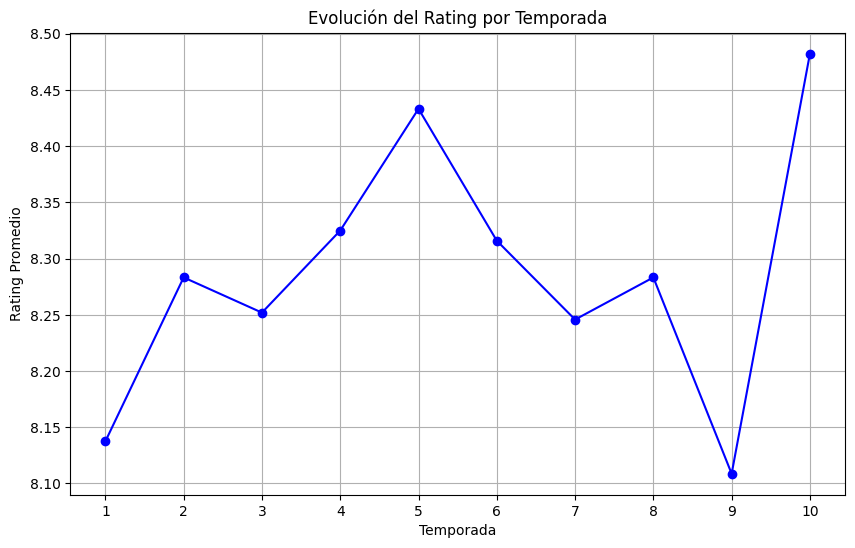

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ratings_por_temporada['season'], ratings_por_temporada['rating'], marker='o', linestyle='-', color='b')
plt.title('Evolución del Rating por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Rating Promedio')
plt.grid(True)
plt.xticks(range(1, df['season'].max() + 1))
plt.show()

Aca vemos claramente que la calidad de la serie (Basandonos solamente en el promedio del rating por temporada) va creciendo hasta tocar su pico maximo en la temporada 5 y de ahi empieza a bajar la calidad del programa.
La tmeporada 10, considero que hay excluirla de este analisas ya que al ser la ultima, seguramente el promeido del rating es mas alto por ese mismo motivo.

# Graficos

Aca vemos cuantos captiulos tienen el rating.

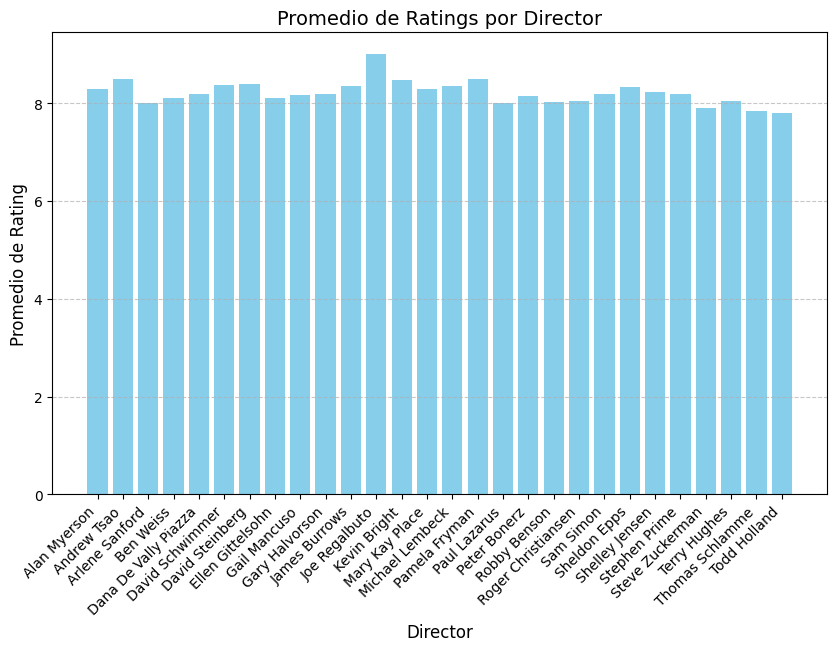

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(promedio_ratings['director'], promedio_ratings['rating'], color='skyblue')

plt.xlabel('Director', fontsize=12)
plt.ylabel('Promedio de Rating', fontsize=12)
plt.title('Promedio de Ratings por Director', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # giro las etiquetas para que sean legibles.
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agrego una cuadricula

En el siguiente Grafico podemos analizar cuantos capitulos (por año) son outlier. En este caso los outlier que estan por arriba, son los episodios con mejor puntaje y por el contrario los que estan abajo, lo que peor puntaje tienen.

<Figure size 1000x600 with 0 Axes>

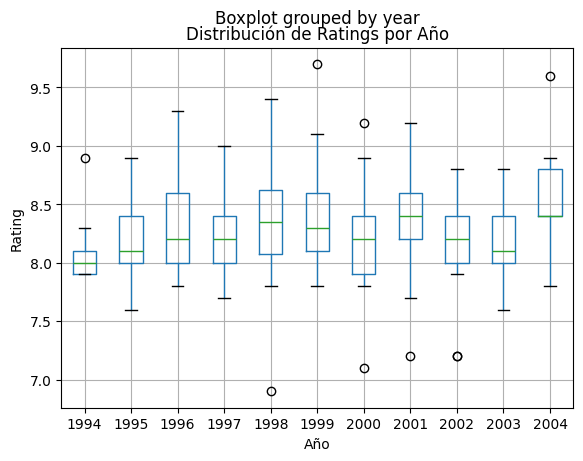

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot(column='rating', by='year')
plt.xlabel('Año')
plt.ylabel('Rating')
plt.title('Distribución de Ratings por Año')
plt.show()


Con el siguiente grafico podes observar los mejores episodio de cada director.

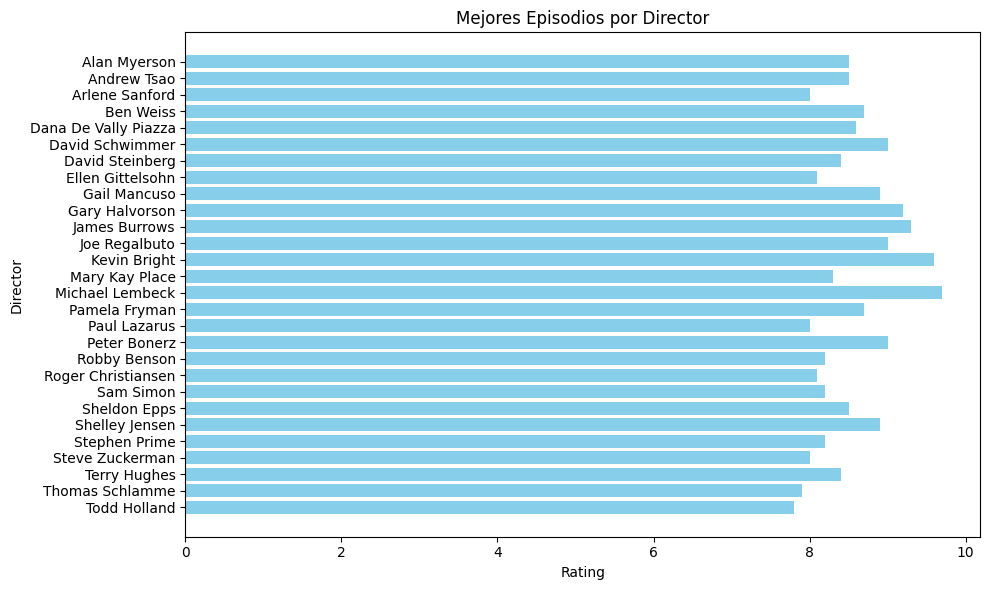

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(mejores_episodios['director'], mejores_episodios['rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Director')
plt.title('Mejores Episodios por Director')
plt.gca().invert_yaxis()  # Invierte el orden para mostrar los ratings más altos arriba
plt.tight_layout()
plt.show()